#Stock Market Analysis for Tech Stocks
**In this project, we'll analyse data from the stock market for some technology stocks.**

Again, we'll use ***Pandas***, ***seaborn*** to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history.

Here are the questions we'll try to answer:

* What was the ***change in a stock's price*** over time?
* What was the ***daily return average*** of a stock?
* What was the ***moving average of various stocks***? List item
* What was the ***correlation between daily returns*** of different stocks?
* How much value do we put at ***risk by investing*** in a particular stock?
* How can we attempt to ***predict future stock*** behaviour?

In [ ]:
! pip install seaborn==0.11.0

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
! pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime

#To handle floats in Python 2
from __future__ import division

In [3]:
tech_stock_list = ['AAPL','GOOG','MSFT','AMZN','TSLA']

In [4]:
start_date = '2019-01-01'
end_date = '2020-11-25'

In [5]:
aapl_stocks = data.DataReader('AAPL', 'yahoo', start_date, end_date)

In [6]:
aapl_stocks.shape

(481, 6)

In [7]:
aapl_stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.249401
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.439476
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.909672
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.829746
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.512772


In [8]:
aapl_stocks.describe()

,High,Low,Open,Close,Volume,Adj Close
count,481.000000,481.000000,481.000000,481.000000,4.810000e+02,481.000000
mean,71.947994,70.178815,71.034558,71.116226,1.325965e+08,70.237261
std,25.667917,24.703281,25.280724,25.179829,6.539110e+07,25.552426
min,36.430000,35.500000,35.994999,35.547501,2.045080e+07,34.439476
25%,50.932499,50.119999,50.462502,50.647499,8.994600e+07,49.354656
50%,66.220001,65.169998,65.647499,65.617500,1.156272e+08,64.569160
75%,83.400002,81.830002,82.562500,83.364998,1.561716e+08,83.071640
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


We can easily, make out the maximum, minimum, average price over the last year for APPLE stocks.

In [9]:
aapl_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 481 entries, 2019-01-02 to 2020-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       481 non-null    float64
 1   Low        481 non-null    float64
 2   Open       481 non-null    float64
 3   Close      481 non-null    float64
 4   Volume     481 non-null    float64
 5   Adj Close  481 non-null    float64
dtypes: float64(6)
memory usage: 26.3 KB


Certainly, there are no missing values in the dataframe. Hence we can analyze the data better & precise.

#CHANGE IN STOCK PRICE OVER TIME FOR *APPLE*

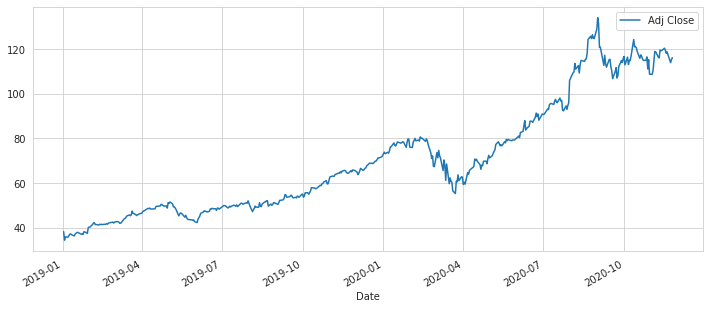

In [10]:
#Plotting the stock's adjusted closing price using pandas
aapl_stocks['Adj Close'].plot(legend=True,figsize=(12,5))



*  Over the year, min adjusted close price is 34 and max is 133 for the Apple stocks.




#Plotting the total volume being traded over time

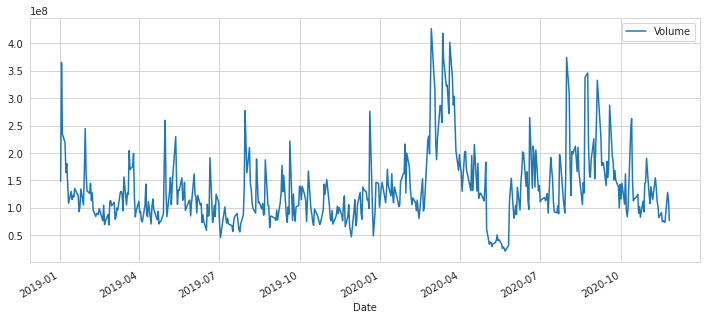

In [11]:
aapl_stocks['Volume'].plot(legend=True,figsize=(12,5))


*  The trading volume is a measure of the total shares that have changed hands for a specific time period. Usually trading volume of any stock will refers to the ***buying interest*** of that perticular stock over a period of time.

*   Apple's stock trading volume have been ***decreasing since the month of september.***

#What was the moving average of stocks?

In [12]:
ma_day = [10,20,30,40,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    aapl_stocks[column_name] = aapl_stocks['Adj Close'].rolling(window=ma,center=False).mean()

In [13]:
aapl_stocks.tail(5)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 30 days,MA for 40 days,MA for 50 days
Date,,,,,,,,,,,
2020-11-19,119.059998,116.809998,117.589996,118.639999,74113000.0,118.639999,118.530000,115.930238,116.868537,116.268532,115.165410
2020-11-20,118.769997,117.290001,118.639999,117.339996,73391400.0,117.339996,118.395000,116.055144,116.887586,116.399866,115.276068
2020-11-23,117.620003,113.750000,117.180000,113.849998,127959300.0,113.849998,118.148000,116.005051,116.543061,116.377066,115.249841
2020-11-24,115.849998,112.589996,113.910004,115.169998,113874200.0,115.169998,118.067999,115.943592,116.352346,116.408978,115.246421
2020-11-25,116.750000,115.169998,115.550003,116.029999,76375300.0,116.029999,117.721999,116.194669,116.187303,116.419464,115.328284


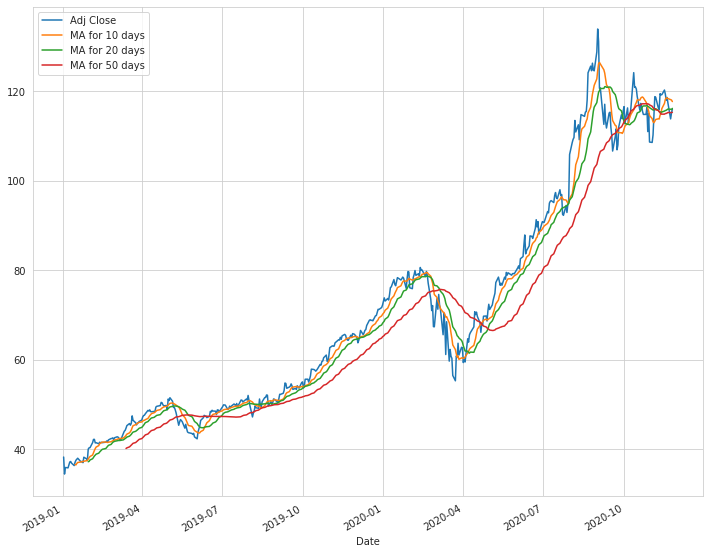

In [14]:
aapl_stocks[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,10))



*   The moving average is calculated by adding a stock's prices over a certain period and dividing the sum by the total number of periods

*  ***Moving average for 50 days*** of Apple stock has ***smoother curve*** compared to the other, so one can rely on this perticular metric to observe the long-term market trends.



#What was the daily return average of a stock?

In [15]:
#The daily return column can be created by using the percentage change over the adjusted closing price
aapl_stocks['Daily Return'] = aapl_stocks['Adj Close'].pct_change()

In [16]:
aapl_stocks['Daily Return'].tail()

Date
2020-11-19    0.005168
2020-11-20   -0.010958
2020-11-23   -0.029743
2020-11-24    0.011594
2020-11-25    0.007467
Name: Daily Return, dtype: float64



* The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price. A ***positive return*** means the ***stock has grown in value***, while a ***negative return*** means it has ***lost value***.




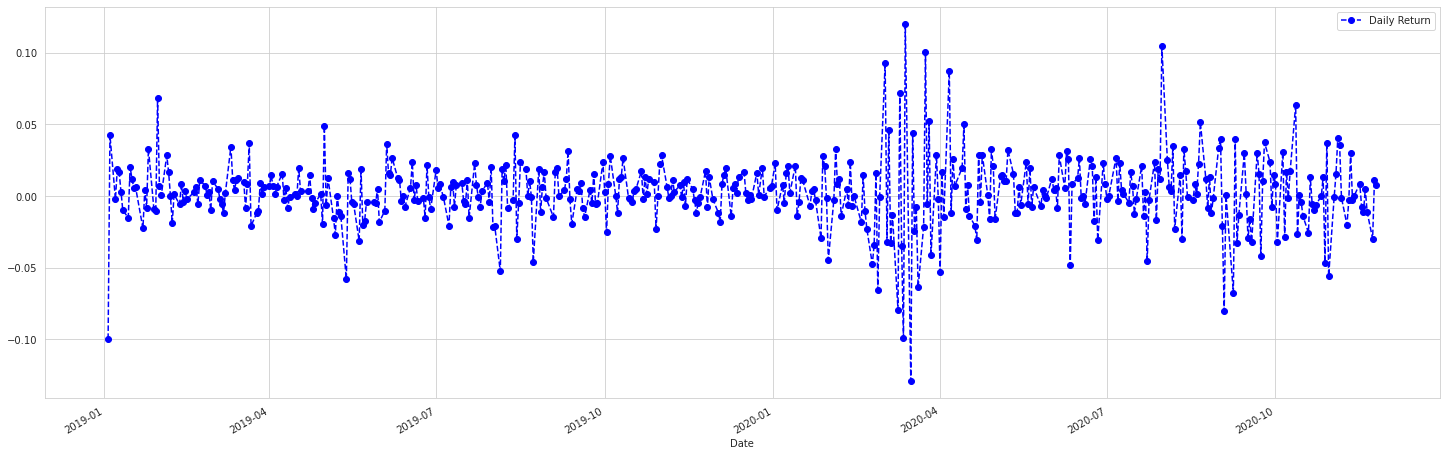

In [17]:
#Plotting the daily return
aapl_stocks['Daily Return'].plot(figsize=(25,8),legend=True,linestyle='--',marker='o',color ='blue')



*   During the later month of March, daily return of Apple stock were **negetive therefore lost some value** and over the next few months it has got some **positive return and high value**.




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


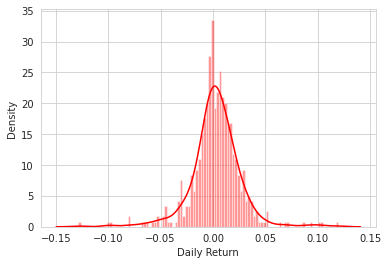

In [18]:
sns.distplot(aapl_stocks['Daily Return'].dropna(),bins=100,color='red')

Positive daily return for Apple stocks were more frequent.

#What was the correlation between daily returns of different stocks?

In [19]:
#Reading just the 'Adj Close' column this time
close_df =data.DataReader(tech_stock_list,'yahoo',start_date,end_date)['Adj Close']

In [20]:
close_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2020-11-19,118.639999,1763.920044,212.419998,3117.020020,499.269989
2020-11-20,117.339996,1742.189941,210.389999,3099.399902,489.609985
2020-11-23,113.849998,1734.859985,210.110001,3098.389893,521.849976
2020-11-24,115.169998,1768.880005,213.860001,3118.060059,555.380005
2020-11-25,116.029999,1771.430054,213.869995,3185.070068,574.000000


In [21]:
rets_df = close_df.pct_change()

In [22]:
rets_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2020-11-19,0.005168,0.009812,0.006348,0.003722,0.025953
2020-11-20,-0.010958,-0.012319,-0.009557,-0.005653,-0.019348
2020-11-23,-0.029743,-0.004207,-0.001331,-0.000326,0.065848
2020-11-24,0.011594,0.019610,0.017848,0.006349,0.064252
2020-11-25,0.007467,0.001442,0.000047,0.021491,0.033527


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


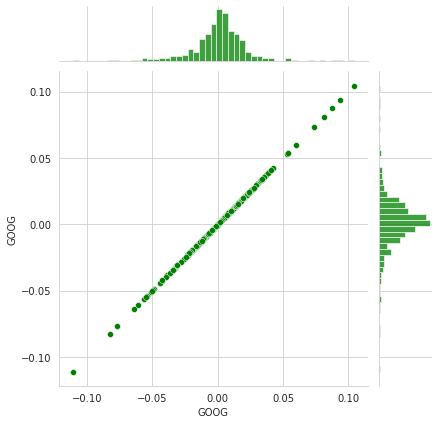

In [23]:
sns.jointplot('GOOG','GOOG',rets_df,kind='scatter',color='green')

As expected, the scatter plot showed no correlation between Google stock hence the line is linear.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


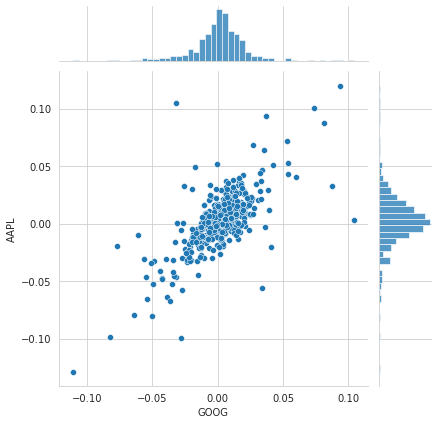

In [24]:
sns.jointplot('GOOG','AAPL',rets_df,kind='scatter')



*   By lokking at the above figure, there seems to be minor correlation between 'GOOG' and 'AAPL' stocks.




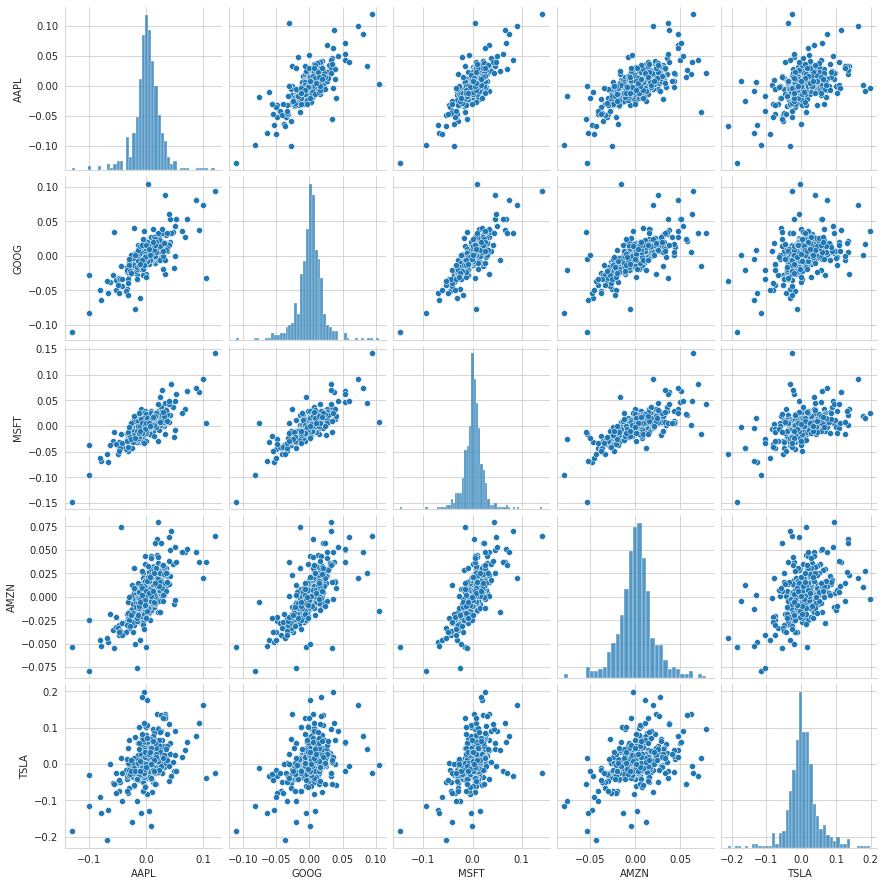

In [25]:
sns.pairplot(rets_df.dropna())

#How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [26]:
rets = rets_df.dropna()

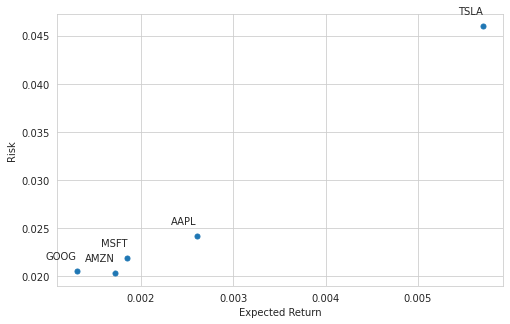

In [27]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(0,10),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.1'))

We'd want a stock to have a ***high expected return and a low risk***; ***Google and Apple*** seem to be the safe options for that. Meanwhile,***Tesla stock*** have ***higher expected returns***, but also have a ***higher risk***

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


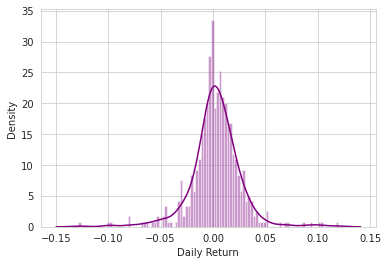

In [28]:
sns.distplot(aapl_stocks['Daily Return'].dropna(),bins=100,color='purple')

In [29]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2019-01-03,-0.099607,-0.028484,-0.036788,-0.025242,-0.031472
2019-01-04,0.042689,0.053786,0.046509,0.050064,0.057697
2019-01-07,-0.002226,-0.002167,0.001275,0.034353,0.054361
2019-01-08,0.019063,0.007385,0.007251,0.016612,0.001164
2019-01-09,0.016982,-0.001505,0.014300,0.001714,0.009483


In [30]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.032288039209760526

The 0.05 empirical quantile of daily returns is at -0.099. This means that with **95% confidence**, the worst daily loss will not exceed **3.22%** (of the investment).

In [31]:
days = 365

#delta t
dt = 1/365

mu = rets['AAPL'].mean()

sigma = rets['AAPL'].std()

In [32]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [33]:
aapl_stocks.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 30 days,MA for 40 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.249401,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.439476,NaN,NaN,NaN,NaN,NaN,-0.099607
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.909672,NaN,NaN,NaN,NaN,NaN,0.042689
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.829746,NaN,NaN,NaN,NaN,NaN,-0.002226
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.512772,NaN,NaN,NaN,NaN,NaN,0.019063


Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

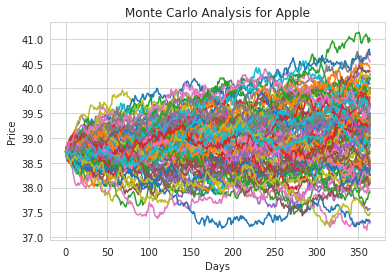

In [34]:
start_price = 38.72 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Apple')

In [35]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock after 365 days')

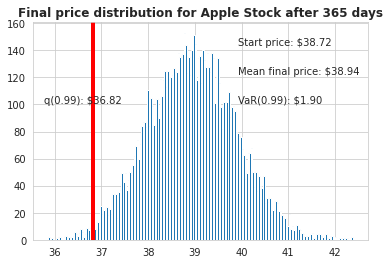

In [36]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Apple Stock after %s days" %days, weight='bold')

We can infer from this that, Apple's stock is pretty stable. The starting price that we had was ***US$ 38.72***, and the average final price over 10000 runs was ***USD 38.92***.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking ***USD 1.92***, 99% of the time.

#Similarly for ***TESLA*** stocks.

In [37]:
days = 365

#delta t
dt = 1/365

mu = rets['TSLA'].mean()

sigma = rets['TSLA'].std()

In [38]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [39]:
tesla_stocks = data.DataReader('TSLA', 'yahoo', start_date, end_date)

In [40]:
tesla_stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000


Text(0.5, 1.0, 'Monte Carlo Analysis for Tesla')

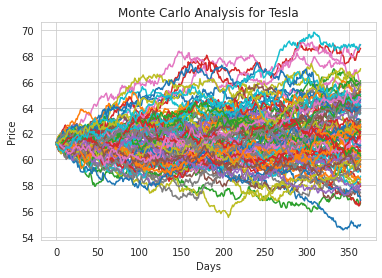

In [41]:
start_price = 61.22 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Tesla')

In [42]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Tesla Stock after 365 days')

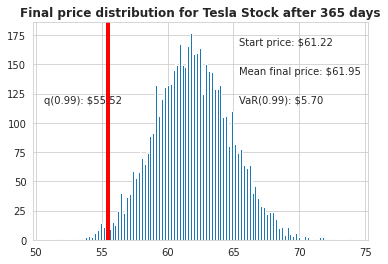

In [43]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Tesla Stock after %s days" %days, weight='bold')

We can infer from this that, Tesla's stock is stable. The starting price that we had was **US$ 61.22**, and the average final price over 10000 runs was **USD 61.99**.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking **USD 5.53**, 99% of the time.

#Similarly For **AMAZON** stocks

In [44]:
amazon_stocks = data.DataReader('AMZN', 'yahoo', start_date, end_date)

In [45]:
amazon_stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005
2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029
2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015
2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200,1629.510010
2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400,1656.579956


In [46]:
days = 365

#delta t
dt = 1/365

mu = rets['AMZN'].mean()

sigma = rets['AMZN'].std()

In [47]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

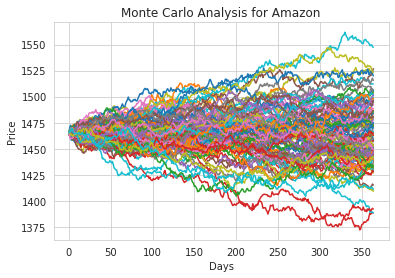

In [48]:
start_price = 1465.19 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title(u'Monte Carlo Analysis for Amazon')

In [49]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Amazon Stock after 365 days')

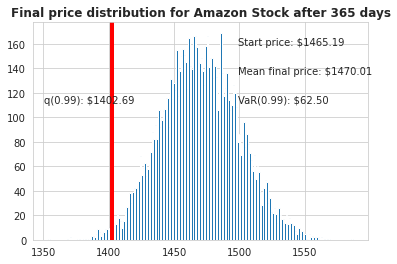

In [50]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Amazon Stock after %s days" %days, weight='bold')

We can infer from this that, Amazon's stock is stable. The starting price that we had was US$ 1465.19, and the average final price over 10000 runs was USD 1469.57.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD 62.61, 99% of the time.

So Amazon's stock price includes low risk and we can expect high return also.

In [51]:
google_stocks = data.DataReader('GOOG', 'yahoo', start_date, end_date)

In [52]:
google_stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015
2019-01-08,1084.560059,1060.530029,1076.109985,1076.280029,1764900,1076.280029


In [53]:
days = 365

#delta t
dt = 1/365

mu = rets['GOOG'].mean()

sigma = rets['GOOG'].std()

In [54]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

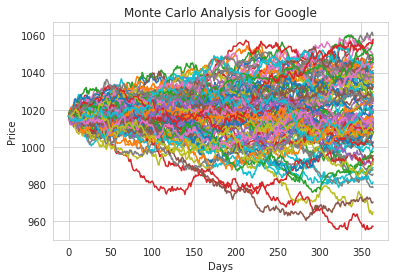

In [55]:
start_price = 1016.57 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title(u'Monte Carlo Analysis for Google')


1.   As you can see in the above  monte - carlo simulation graph, Google's stock price can go below USD 960, after around next 280 days.
2.   It may fetch as high as USD 1060 after 350 days in the market trend.

In [56]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

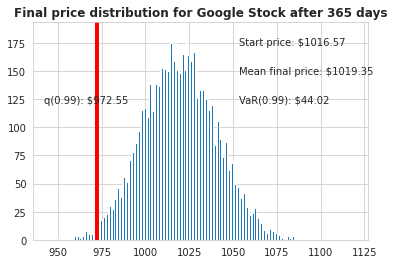

In [57]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

We can infer from this that, Google's stock is stable. The starting price that we had was US$ 1016.57, and the average final price over 10000 runs was USD 1019.65.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD 43.33, 99% of the time.